# Feature Selection / Dimensionality Reduction

In [140]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from data_utils import *
from modeling import *

from sklearn import metrics, linear_model, ensemble, \
preprocessing, model_selection, neural_network, neighbors, gaussian_process
from scipy import stats

import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.style.use('seaborn')
rcParams.update({'figure.autolayout': True,
                 'xtick.top': True,
                 'xtick.direction': 'in',
                 'ytick.right': True,
                 'ytick.direction': 'in',
                 'font.sans-serif': 'Arial',
                 'font.size': 14,
                 'savefig.dpi': 300,
                 'figure.dpi': 96
                })
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Reload the data from where we left off

In [141]:
df = load_clean()
X = featurize(df)
y = df['Heat of Formation (kJ/mol H2)']
df.sample(3)

Widget Javascript not detected.  It may not be installed or enabled properly.


,Material Class,Composition Formula,Hydrogen Weight Percent,Heat of Formation (kJ/mol H2),Temperature (˚C),Pressure (Atmospheres Absolute),Author Year,Reference Number,Comment1,Comment2,Comment3,clean_composition,composition
2298,MIC,Ti3Sb,0.8,110,NaN,NaN,"Rao, 1982",533,NaN,NaN,NaN,Ti3Sb,"(Ti, Sb)"
590,AB2,ZrFeV,1.6,48.1,50,0.0012,"Shaltiel, 1977",14,NaN,NaN,NaN,ZrFeV,"(Zr, Fe, V)"
179,AB,TiCu,1.7,75,200,0.004,"Maeland, 1978",389,NaN,NaN,NaN,TiCu,"(Ti, Cu)"


In [142]:
X_test, df_test = load_test_data(X, standardize=False)
X_test.sample(3)

Widget Javascript not detected.  It may not be installed or enabled properly.


,minimum Number,maximum Number,range Number,mean Number,avg_dev Number,mode Number,minimum MendeleevNumber,maximum MendeleevNumber,range MendeleevNumber,mean MendeleevNumber,...,range GSmagmom,mean GSmagmom,avg_dev GSmagmom,mode GSmagmom,minimum SpaceGroupNumber,maximum SpaceGroupNumber,range SpaceGroupNumber,mean SpaceGroupNumber,avg_dev SpaceGroupNumber,mode SpaceGroupNumber
32,22.0,40.0,18.0,24.838710,2.101977,25.0,43.0,52.0,9.0,48.096774,...,0.000310,0.000147,0.000148,0.00031,194.0,229.0,35.0,211.161290,12.178980,217.0
41,13.0,40.0,27.0,23.938710,1.666629,25.0,43.0,73.0,30.0,48.598387,...,2.110663,0.081862,0.157068,0.00031,194.0,229.0,35.0,211.787097,11.475546,217.0
23,22.0,74.0,52.0,25.377419,3.125068,25.0,43.0,52.0,9.0,47.924194,...,0.000310,0.000107,0.000131,0.00031,194.0,229.0,35.0,212.709677,13.277836,217.0


In [143]:
print('Main frame size: {}\n'.format(df.shape),
      'test frame size: {}\n'.format(df_test.shape),
      'Feature Array size: {}\n'.format(X.shape),
      'Test Features size: {}'.format(X_test.shape))

Main frame size: (542, 13)
 test frame size: (50, 8)
 Feature Array size: (542, 132)
 Test Features size: (50, 132)


# Try out new evaluation class

In [154]:
rf_reg = Regressor(ensemble.RandomForestRegressor(), name='Random Forest')
scores = rf_reg.evaluate(X, y, shuffle=True, n_splits=5)
scores

train                                            val                    \
       mae     mape   medape   pearson  spearman      mae     mape   medape   
0  4.20757  13.1984      5.6  0.972178  0.945841  9.02131  22.1922  11.0956   
1  4.18188   9.5738      5.1  0.951167  0.952501  8.53982  42.3056  11.7974   
2  4.37933  13.7015  5.82438  0.967456   0.93434  9.54956  23.2025  13.9274   
3  3.93346  11.0098  5.35793  0.965597  0.943557  12.3784   23.486  12.1562   
4  4.14125  11.4243  4.93974   0.96927  0.952932    7.844  25.4779   10.204   

                       
    pearson  spearman  
0  0.774005  0.788513  
1  0.808204  0.863956  
2  0.788609  0.742162  
3  0.683362   0.78086  
4  0.861537  0.688515

In [156]:
weird_pts_train = rf_reg.last_splits[scores[('val','mape')].astype(float).idxmax()][0]
weird_pts_val = rf_reg.last_splits[scores[('val','mape')].astype(float).idxmax()][1]
df.iloc[weird_pts]

,Material Class,Composition Formula,Hydrogen Weight Percent,Heat of Formation (kJ/mol H2),Temperature (˚C),Pressure (Atmospheres Absolute),Author Year,Reference Number,Comment1,Comment2,Comment3,clean_composition,composition
90,A2B,Mg1.92Al.08Ni,3.50,70.5,295,4,"Hirata, 1983",427,NaN,NaN,NaN,Mg1.92Al.08Ni,"(Mg, Al, Ni)"
101,A2B,Mg2Co,4.50,76,450,16,"Reiser, 2000",1463,Mg2Co not stable without H,NaN,NaN,Mg2Co,"(Mg, Co)"
113,A2B,Mg2Ni,3.50,64.4,180,0.07,"Guthrie, 1998",863,Vapor synthesized,Twinned,NaN,Mg2Ni,"(Mg, Ni)"
167,AB,TiCo,1.40,57.4,155,4,"Yamanaka, 1975",73,NaN,NaN,NaN,TiCo,"(Ti, Co)"
190,AB,TiFe.7Mn.2,2.00,34.7,40,1.4,"Reilly, 1976",383,NaN,NaN,NaN,TiFe.7Mn.2,"(Ti, Fe, Mn)"
199,AB,TiFe.8Ni.2,1.30,41.2,50,0.33,"Huston, 1980",77,NaN,NaN,NaN,TiFe.8Ni.2,"(Ti, Fe, Ni)"
215,AB,TiFe.9Ni.1,1.40,35.6,50,1.8,"Lee, 1999",1211,NaN,NaN,NaN,TiFe.9Ni.1,"(Ti, Fe, Ni)"
252,AB,HfNi (M),1.30,40,190,1,"Nemirovskaya, 1991",606,NaN,NaN,NaN,HfNi,"(Hf, Ni)"
271,AB,LiPt,0.60,134,NaN,NaN,"Nacken, 1977",388,NaN,NaN,NaN,LiPt,"(Li, Pt)"
272,AB,LuNi,1.20,100,NaN,NaN,"Ensslen, 1983",385,NaN,NaN,NaN,LuNi,"(Lu, Ni)"


In [157]:
std = preprocessing.StandardScaler()
X_weird_train = X.iloc[weird_pts_train]
y_weird_train = y.iloc[weird_pts_train]
std.fit(X_weird_train)
X_weird_train_std = std.transform(X_weird_train)
X_weird_val_std = std.transform(X.iloc[weird_pts_val])
rf_reg.estimator.fit(X_weird_train_std, y_weird_train)
y_pred_weird = rf_reg.estimator.predict(X_weird_val_std)
y_true_weird = y.iloc[weird_pts_val]

<IPython.core.display.Javascript object>


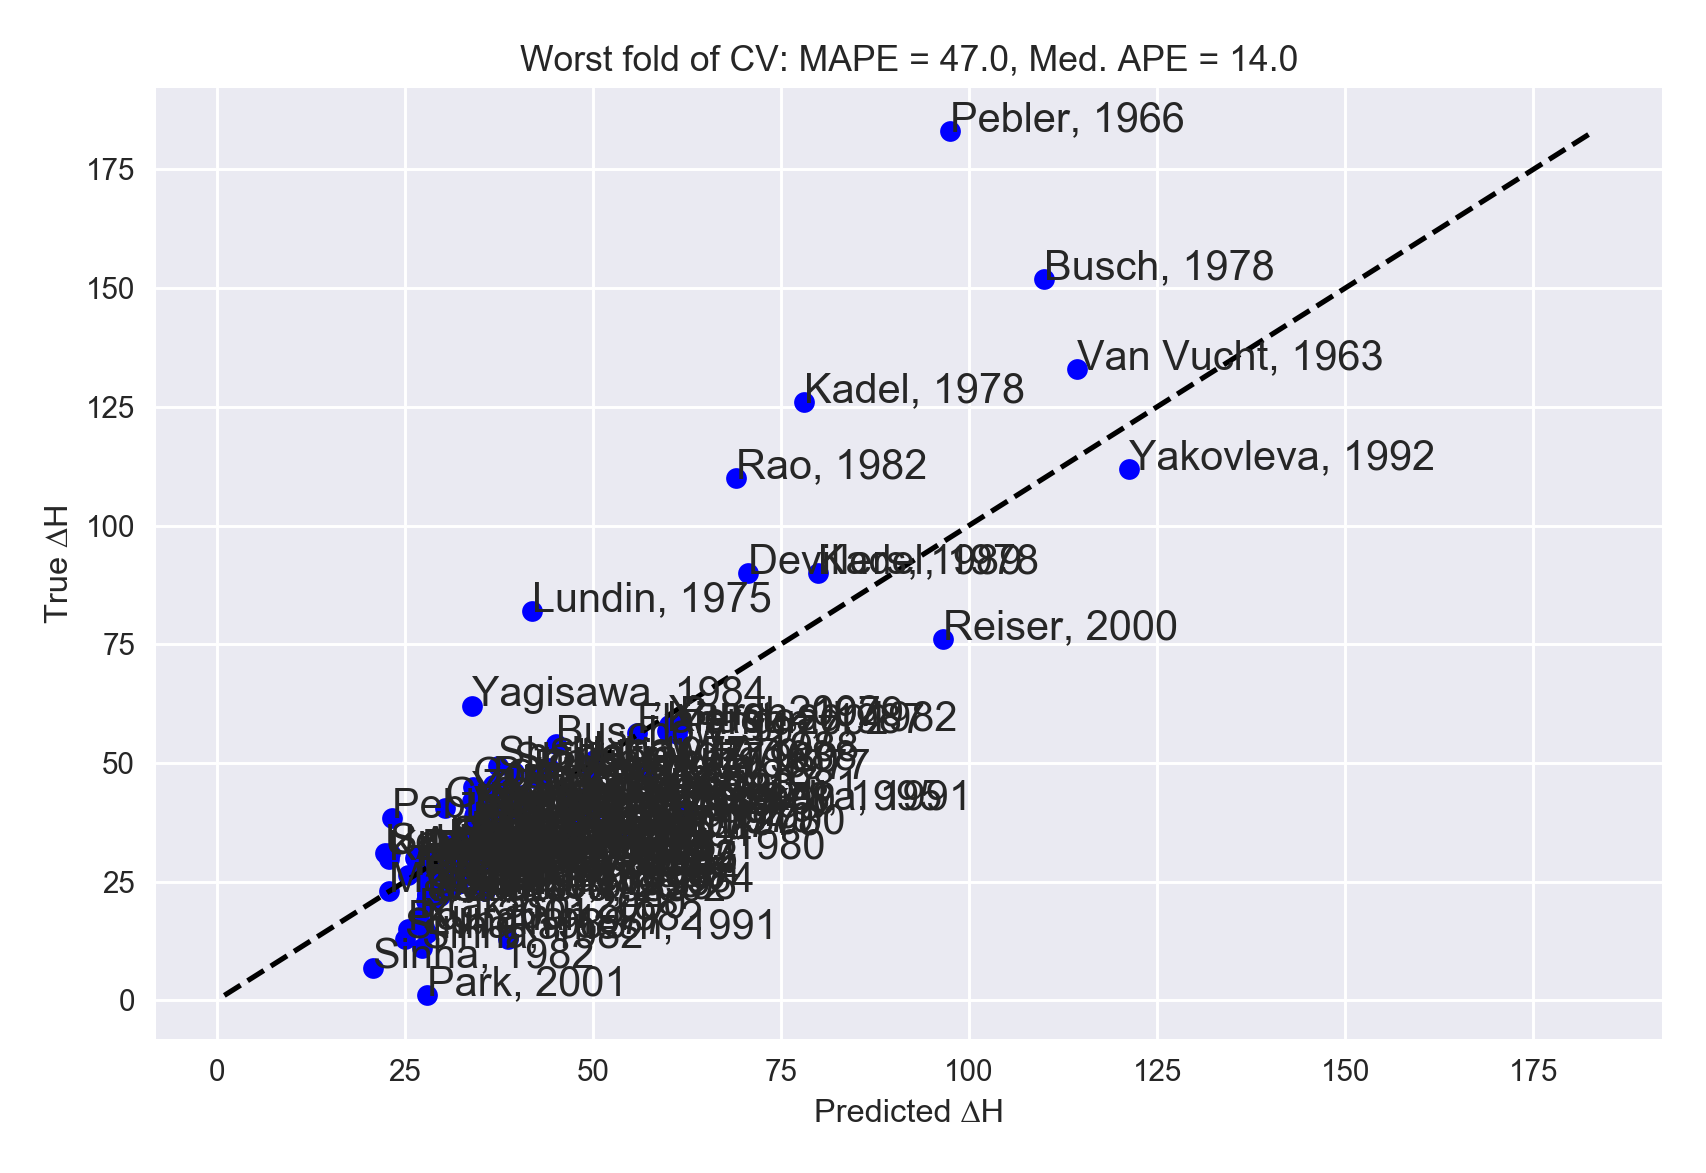

47.18975465151622 42.30560003490814


In [158]:
plt.figure()
plt.plot(y_pred_weird,y_true_weird,'ob')
plt.plot([min(y_true_weird), max(y_true_weird)],
         [min(y_true_weird), max(y_true_weird)],
         '--k')
for i,ind in enumerate(weird_pts_val):
    plt.annotate(df['Author Year'].iloc[ind],
                 (y_pred_weird[i], y_true_weird.iloc[i]))
print(mean_absolute_percentage_error(y_true_weird,y_pred_weird),
      scores[('val','mape')].max())
plt.title('Worst fold of CV: MAPE = {}, Med. APE = {}'.format(
    np.round(mean_absolute_percentage_error(y_true_weird,y_pred_weird),0),
    np.round(median_absolute_percentage_error(y_true_weird,y_pred_weird),0)))
plt.xlabel('Predicted ∆H'); plt.ylabel('True ∆H')
plt.savefig('figures/mean_vs_median_worst_case.png')

<IPython.core.display.Javascript object>


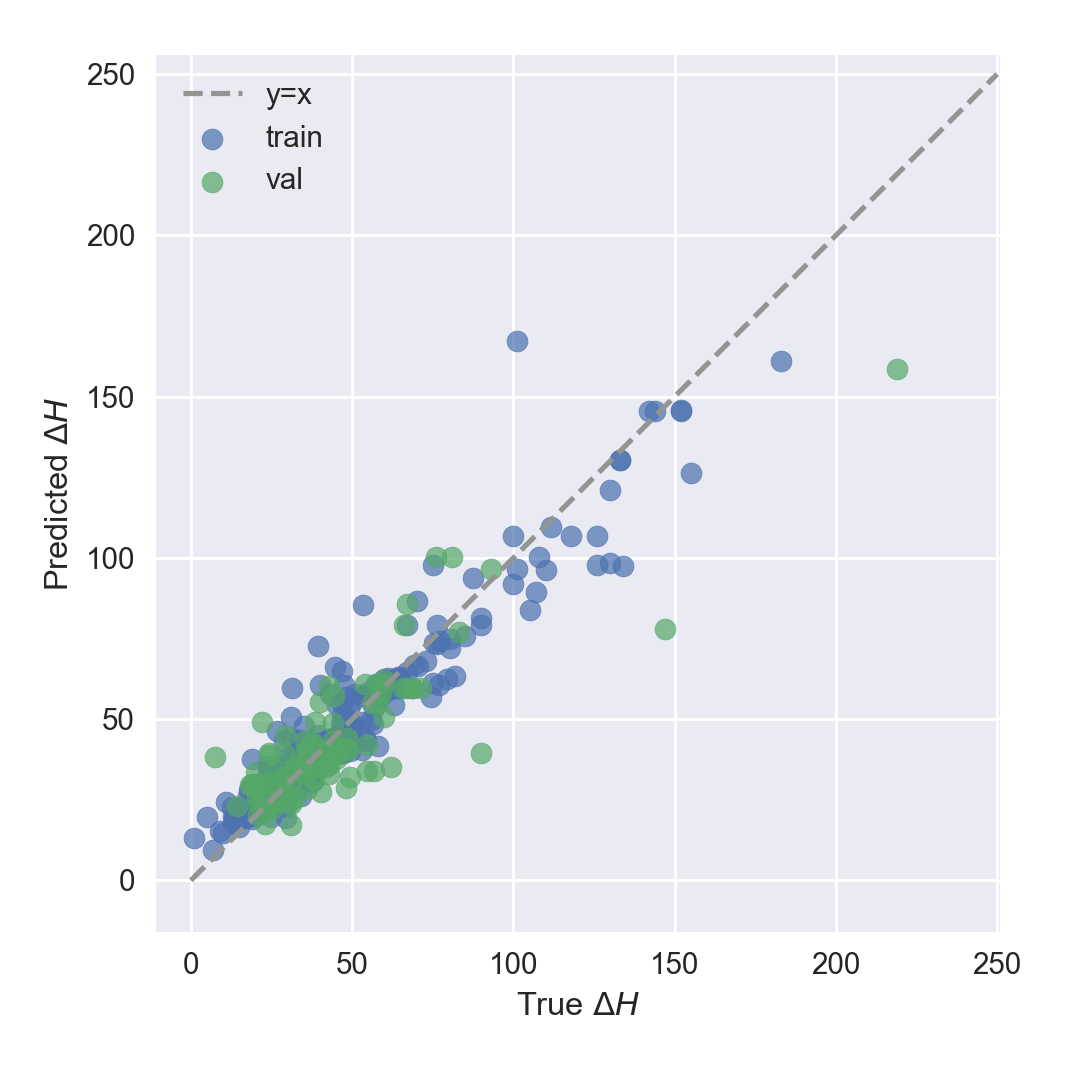

MAPE: 26.264143426650755 ± 14.193177893886078


In [52]:
rf_reg.parity_plot(X, y, lim=250)
print('MAPE: {} ± {}'.format(rf_reg.last_scores['val','mape'].mean(),
                             rf_reg.last_scores['val','mape'].std()))

# AdaBoost Regressor

In [36]:
ada_reg = Regressor(ensemble.AdaBoostRegressor(), name='AdaBoost')
scores = ada_reg.evaluate(X, y)
scores

train                                   val                             
       mae     mape   pearson  spearman      mae     mape   pearson  spearman
0    9.465  37.6631  0.937979  0.680187  11.5612  34.4169  0.701197   0.64859
1  9.66841  31.5138  0.933525  0.721453  9.88477   65.528  0.845578  0.642698
2  9.12412  36.5287  0.912629  0.704323  14.1196  34.3511  0.754733  0.627812
3   10.005  40.1071  0.925574  0.699986  11.2328  31.0614  0.842165  0.741855
4  8.99931  36.2604  0.936749  0.733492  11.6154   37.816  0.792218  0.688315

<IPython.core.display.Javascript object>


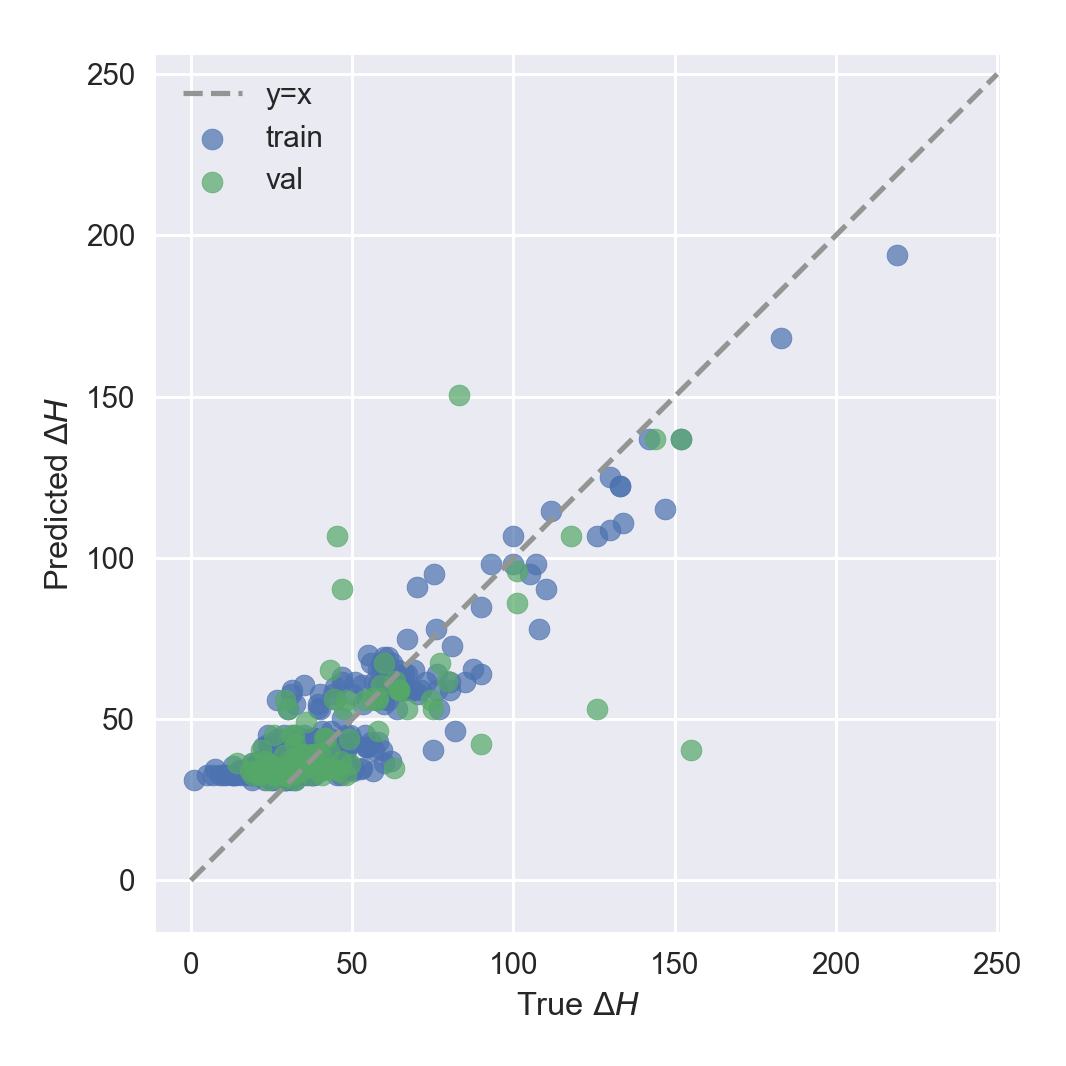

MAPE: 40.63468718770475 ± 14.119276476132276


In [37]:
ada_reg.parity_plot(X, y, lim=250)
print('MAPE: {} ± {}'.format(ada_reg.last_scores['val','mape'].mean(),
                             ada_reg.last_scores['val','mape'].std()))

# KNN Regressor

In [29]:
knn_hypes = {'n_neighbors':3, 'leaf_size':3}
knn_reg = Regressor(neighbors.KNeighborsRegressor(), name='KNN')
scores = knn_reg.evaluate(X, y, hypes=knn_hypes)
scores.mean()

train  mae          6.699293
       mape        19.296399
       pearson      0.917077
       spearman     0.879633
val    mae          9.551709
       mape        27.069984
       pearson      0.772580
       spearman     0.776874
dtype: float64

<IPython.core.display.Javascript object>


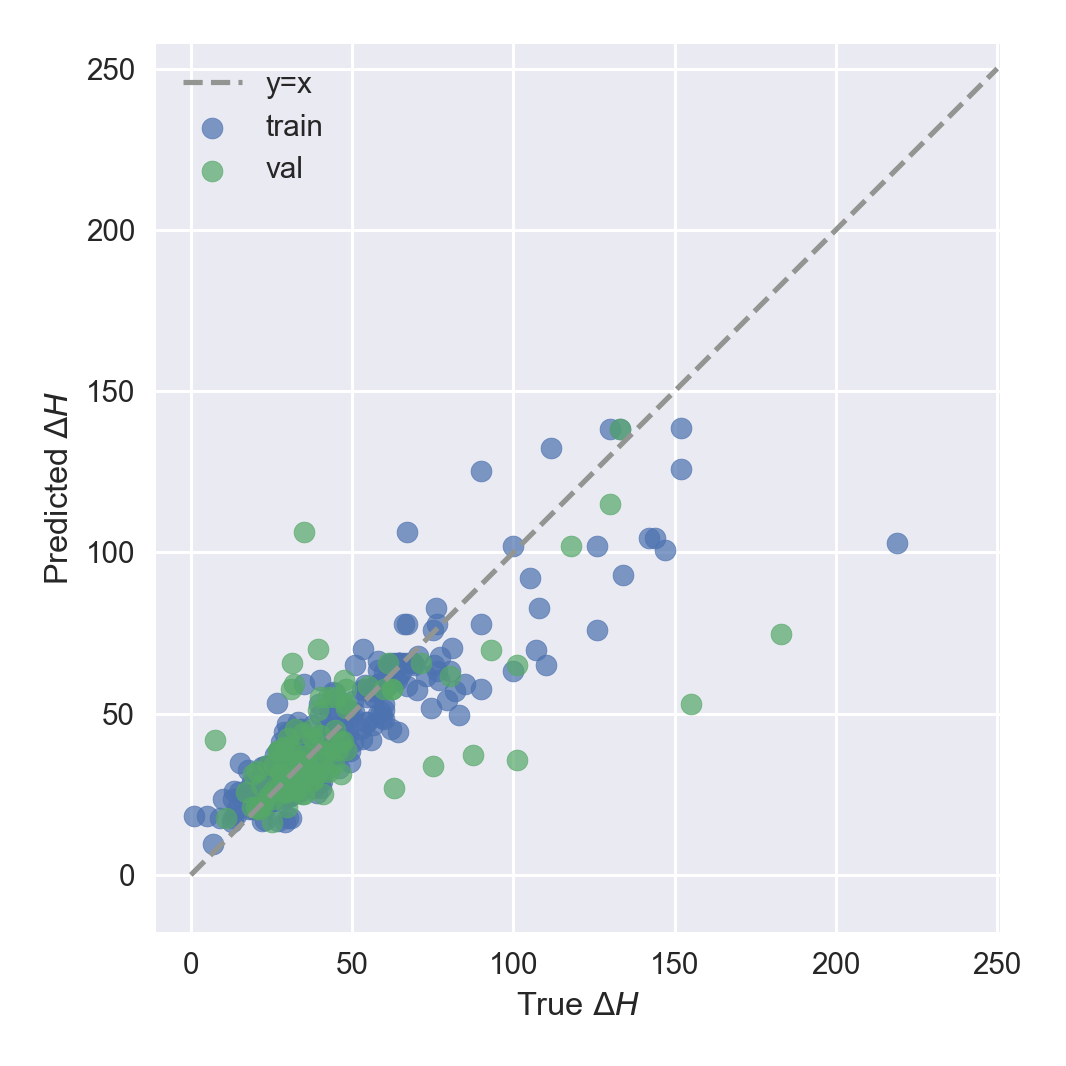

MAPE: 27.06998367286865 ± 11.37611164452217


In [30]:
knn_reg.parity_plot(X, y, lim=250, hypes=knn_hypes)
print('MAPE: {} ± {}'.format(knn_reg.last_scores['val','mape'].mean(),
                             knn_reg.last_scores['val','mape'].std()))

# MLP Regressor

In [31]:
nn_reg = Regressor(neural_network.MLPRegressor())
nn_reg.evaluate(X, y)

/anaconda/envs/pyTen/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



train                                   val                             
       mae     mape   pearson  spearman      mae     mape   pearson  spearman
0  8.85562  28.3893  0.894619  0.742693  8.53318  23.3122  0.692696  0.658111
1  7.94572  21.2585  0.920028  0.786012  10.3484  49.9986  0.651489  0.597775
2  8.26354  26.3123  0.907171  0.745895  10.9087  30.8067  0.811377  0.646401
3   7.5244  25.2215  0.878978  0.746649   13.016  26.6017   0.74208  0.667171
4  7.84874  26.4843   0.91313  0.763674  11.9508  26.0176  0.708851  0.707763

/anaconda/envs/pyTen/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



<IPython.core.display.Javascript object>


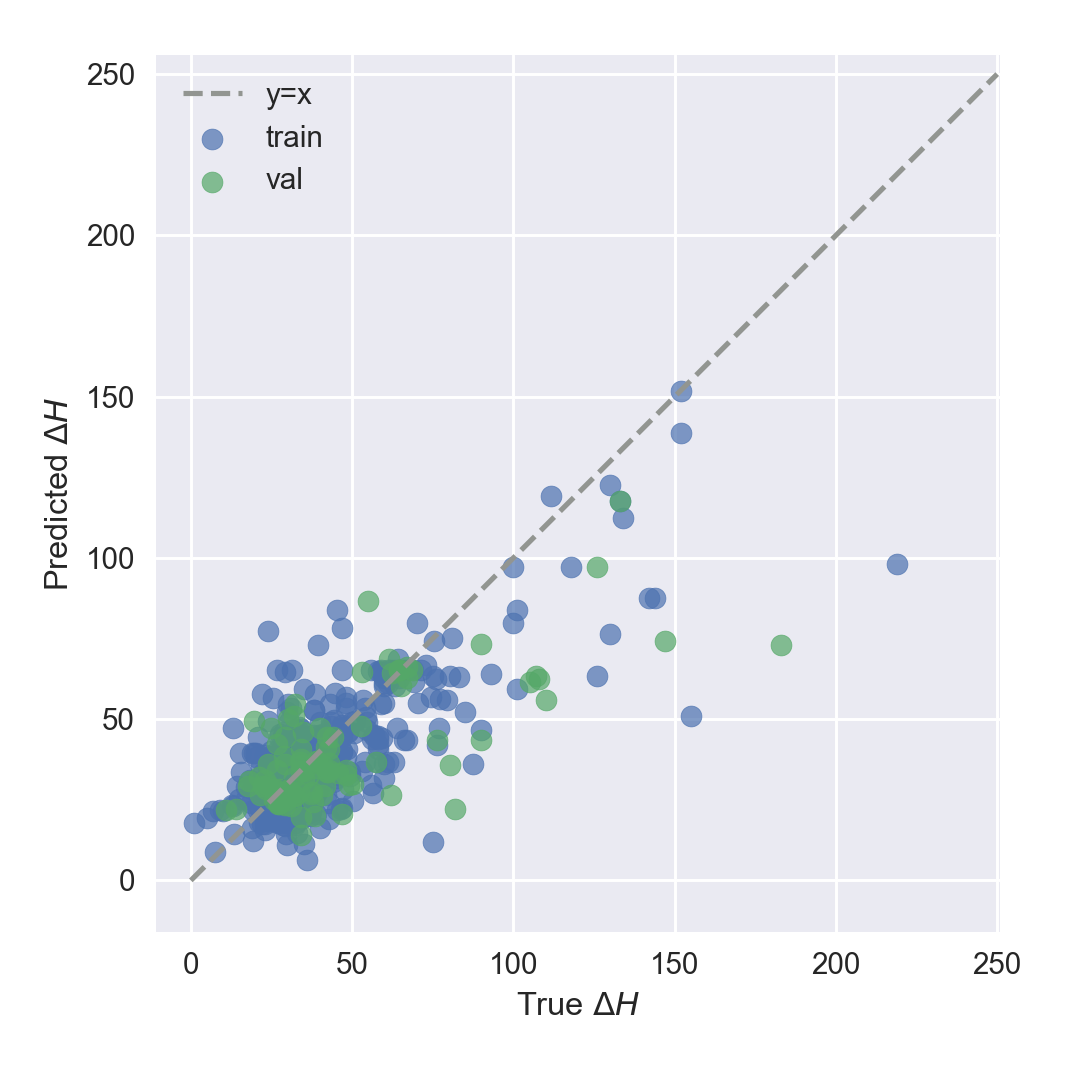

MAPE: 31.347359820485167 ± 10.766317267749663


In [33]:
nn_reg.parity_plot(X, y,
                   hypes = {'hidden_layer_sizes':(20, )},
                   lim=250)
print('MAPE: {} ± {}'.format(nn_reg.last_scores['val','mape'].mean(),
                             nn_reg.last_scores['val','mape'].std()))

# Evalute RandomForest with random subsets of features

In [97]:
cols_fs = ['num_feats', 'feat_list', 'mape_mean', 'mape_std']
df_fs = pd.DataFrame(columns=cols_fs)

idx = 0
for n_feats in range(3,X.shape[1]+1):
    print(n_feats)
    for rep in range(11):
        X_subset = X.sample(n_feats, axis=1)
        scores_i = rf_reg.evaluate(X_subset, y, n_splits=3)
        res_list = [n_feats, X_subset.columns,
                    scores_i['val','mape'].mean(),
                    scores_i['val','mape'].std()]
        res_dict = {k:v for k,v in zip(cols_fs, res_list)}
        df_fs = df_fs.append(res_dict, ignore_index=True)
        idx+=1

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132


<IPython.core.display.Javascript object>


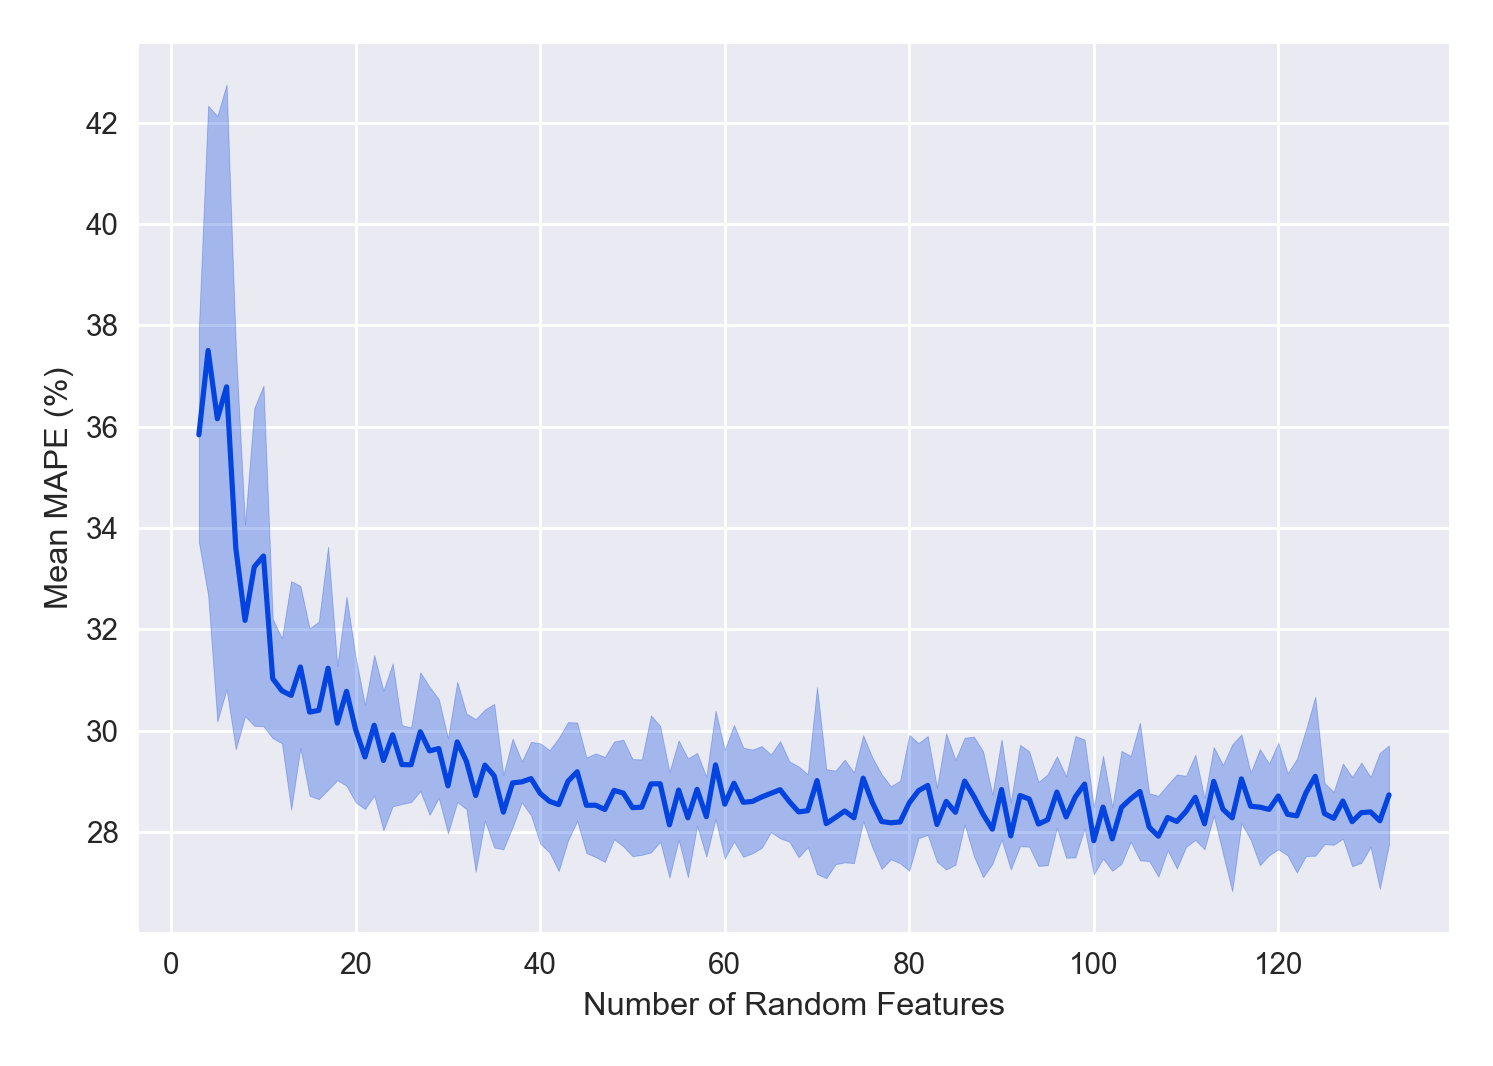

Text(0,0.5,'Mean MAPE (%)')

In [99]:
plt.figure(figsize=(7,5))
ax=plt.gca()
n_feats = df_fs.groupby('num_feats').count().index.values
means = df_fs.groupby('num_feats').mean()['mape_mean']
stds = df_fs.groupby('num_feats').std()['mape_mean']

ax.plot(n_feats,means,'-',color='xkcd:blue')
ax.fill_between(n_feats, means-stds, means+stds, color='xkcd:blue', alpha=0.3)
ax.set_xlabel('Number of Random Features')
ax.set_ylabel('Mean MAPE (%)')

# Perform Recursive Feature Elimination on some models from the previous selection process

Namely, the random forest, gradient boosting, and bagging regressors

In [6]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [7]:
def parity_plot(y_true, y_pred, newfig=True, figsize=(5,5), lim=450, title=''):
    if newfig:
        plt.figure(figsize=figsize,
                   tight_layout=False)
        
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot((0,lim), (0,lim), linestyle='--', color='k')
    plt.xlim([-10,lim]); plt.ylim([-10,lim])
    plt.gca().set_aspect('equal','datalim')

    plt.xlabel(r'$\Delta H$')
    plt.ylabel(r'predicted $\Delta H$')
    plt.title(title + 'MAE: {} kJ/mol'.format(np.round(mean_absolute_percentage_error(y_true, y_pred),
                                               decimals=2)))

## Retrieve the ensemble models again

In [20]:
cc = df['composition'].iloc[0]
cc

Comp: Ce0.5 Th1.5 Al1

In [15]:
df.groupby('composition').count()

,Material Class,Composition Formula,Hydrogen Weight Percent,Heat of Formation (kJ/mol H2),Temperature (˚C),Pressure (Atmospheres Absolute),Author Year,Reference Number,Comment1,Comment2,Comment3,clean_composition
composition,,,,,,,,,,,,
"(Pd, Rh)",1,1,1,1,1,1,1,1,0,0,0,1
"(Pd, Rh)",1,1,1,1,1,1,1,1,0,0,0,1
"(Pd, Rh)",1,1,1,1,1,1,1,1,0,0,0,1
"(Pd, Pt, Rh)",1,1,1,1,1,1,1,1,0,0,0,1
"(Pd, Rh)",3,3,3,3,3,3,3,3,0,0,0,3
"(Pd, Pt)",2,2,2,2,2,2,2,2,0,0,0,2
"(Pd, Pt)",1,1,1,1,1,1,1,1,0,0,0,1
"(Pd, Rh)",1,1,1,1,1,1,1,1,0,0,0,1
"(Pd, Rh)",2,2,2,2,2,2,2,2,0,0,0,2


In [8]:
ens = pd.Series([s for s in vars(ensemble)['__all__'] if 'Classifier' not in s])
ens

0                  BaseEnsemble
1         RandomForestRegressor
2          RandomTreesEmbedding
3           ExtraTreesRegressor
4              BaggingRegressor
5               IsolationForest
6     GradientBoostingRegressor
7             AdaBoostRegressor
8                       bagging
9                        forest
10            gradient_boosting
11           partial_dependence
12              weight_boosting
dtype: object

In [9]:
df_ens = pd.DataFrame()
df_ens['name'] = ens.loc[[1,4,6]]
df_ens

,name
1,RandomForestRegressor
4,BaggingRegressor
6,GradientBoostingRegressor


## Define an RFECV object

eval_no_fit is a custom method I wrote to return the raw data on the fitting for all feature sets, instead of trying to pick the best number of features

sklearn allows parallelization for this task

In [8]:
from sklearn.feature_selection import RFECV

estimator0 = ensemble.RandomForestRegressor(n_estimators=10, max_depth=5)
scorer = metrics.make_scorer(mean_absolute_percentage_error, greater_is_better=False)

rfe = RFECV(estimator0,
            cv=model_selection.KFold(5, shuffle=True),
            scoring=scorer,
            verbose=1,
            n_jobs=5)
rfe.eval_no_fit(X,y)

Fitting estimator with 132 features.
Fitting estimator with 132 features.
Fitting estimator with 132 features.
Fitting estimator with 132 features.
Fitting estimator with 132 features.


JoblibTypeError: JoblibTypeError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/anaconda/envs/pyTen/lib/python3.6/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/anaconda/envs/pyTen/lib/python3.6/runpy.py in _run_code(code=<code object <module> at 0x10ca80150, file "/ana...3.6/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/anaconda/envs/pyTen/lib/python3.6/site-packages/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/anaconda/envs/pyTen/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/anaconda/en.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x10ca80150, file "/ana...3.6/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/anaconda/envs/pyTen/lib/python3.6/site-packages/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/anaconda/envs/pyTen/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/anaconda/en.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/anaconda/envs/pyTen/lib/python3.6/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/anaconda/envs/pyTen/lib/python3.6/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/anaconda/envs/pyTen/lib/python3.6/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    472             return self.subapp.start()
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         try:
--> 477             ioloop.IOLoop.instance().start()
    478         except KeyboardInterrupt:
    479             pass
    480 
    481 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/anaconda/envs/pyTen/lib/python3.6/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
/anaconda/envs/pyTen/lib/python3.6/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
/anaconda/envs/pyTen/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/anaconda/envs/pyTen/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/anaconda/envs/pyTen/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/anaconda/envs/pyTen/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/anaconda/envs/pyTen/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/anaconda/envs/pyTen/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/anaconda/envs/pyTen/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'from sklearn.feature_selection import RFECV\n\nest...ose=1,\n            n_jobs=5)\nrfe.eval_no_fit(X,y)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 2, 1, 20, 41, 43, 31281, tzinfo=tzutc()), 'msg_id': '0E1D02B9EA1D48A2B366124413406762', 'msg_type': 'execute_request', 'session': 'AB160BD7724A40A684EC71AD7C58E87C', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '0E1D02B9EA1D48A2B366124413406762', 'msg_type': 'execute_request', 'parent_header': {}})
    230             self.log.warn("Unknown message type: %r", msg_type)
    231         else:
    232             self.log.debug("%s: %s", msg_type, msg)
    233             self.pre_handler_hook()
    234             try:
--> 235                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'AB160BD7724A40A684EC71AD7C58E87C']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'from sklearn.feature_selection import RFECV\n\nest...ose=1,\n            n_jobs=5)\nrfe.eval_no_fit(X,y)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 2, 1, 20, 41, 43, 31281, tzinfo=tzutc()), 'msg_id': '0E1D02B9EA1D48A2B366124413406762', 'msg_type': 'execute_request', 'session': 'AB160BD7724A40A684EC71AD7C58E87C', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '0E1D02B9EA1D48A2B366124413406762', 'msg_type': 'execute_request', 'parent_header': {}}
    236             except Exception:
    237                 self.log.error("Exception in message handler:", exc_info=True)
    238             finally:
    239                 self.post_handler_hook()

...........................................................................
/anaconda/envs/pyTen/lib/python3.6/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'AB160BD7724A40A684EC71AD7C58E87C'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'from sklearn.feature_selection import RFECV\n\nest...ose=1,\n            n_jobs=5)\nrfe.eval_no_fit(X,y)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 2, 1, 20, 41, 43, 31281, tzinfo=tzutc()), 'msg_id': '0E1D02B9EA1D48A2B366124413406762', 'msg_type': 'execute_request', 'session': 'AB160BD7724A40A684EC71AD7C58E87C', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '0E1D02B9EA1D48A2B366124413406762', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/anaconda/envs/pyTen/lib/python3.6/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='from sklearn.feature_selection import RFECV\n\nest...ose=1,\n            n_jobs=5)\nrfe.eval_no_fit(X,y)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'from sklearn.feature_selection import RFECV\n\nest...ose=1,\n            n_jobs=5)\nrfe.eval_no_fit(X,y)'
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
/anaconda/envs/pyTen/lib/python3.6/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('from sklearn.feature_selection import RFECV\n\nest...ose=1,\n            n_jobs=5)\nrfe.eval_no_fit(X,y)',), **kwargs={'silent': False, 'store_history': True})
    528             )
    529         self.payload_manager.write_payload(payload)
    530 
    531     def run_cell(self, *args, **kwargs):
    532         self._last_traceback = None
--> 533         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('from sklearn.feature_selection import RFECV\n\nest...ose=1,\n            n_jobs=5)\nrfe.eval_no_fit(X,y)',)
        kwargs = {'silent': False, 'store_history': True}
    534 
    535     def _showtraceback(self, etype, evalue, stb):
    536         # try to preserve ordering of tracebacks and print statements
    537         sys.stdout.flush()

...........................................................................
/anaconda/envs/pyTen/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='from sklearn.feature_selection import RFECV\n\nest...ose=1,\n            n_jobs=5)\nrfe.eval_no_fit(X,y)', store_history=True, silent=False, shell_futures=True)
   2693                 self.displayhook.exec_result = result
   2694 
   2695                 # Execute the user code
   2696                 interactivity = "none" if silent else self.ast_node_interactivity
   2697                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2698                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2699                 
   2700                 self.last_execution_succeeded = not has_raised
   2701 
   2702                 # Reset this so later displayed values do not modify the

...........................................................................
/anaconda/envs/pyTen/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.ImportFrom object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>], cell_name='<ipython-input-8-82bf89bfc7aa>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 1257e6da0, execution_..._before_exec=None error_in_exec=None result=None>)
   2803                     return True
   2804 
   2805             for i, node in enumerate(to_run_interactive):
   2806                 mod = ast.Interactive([node])
   2807                 code = compiler(mod, cell_name, "single")
-> 2808                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x125463f60, file "<ipython-input-8-82bf89bfc7aa>", line 11>
        result = <ExecutionResult object at 1257e6da0, execution_..._before_exec=None error_in_exec=None result=None>
   2809                     return True
   2810 
   2811             # Flush softspace
   2812             if softspace(sys.stdout, 0):

...........................................................................
/anaconda/envs/pyTen/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x125463f60, file "<ipython-input-8-82bf89bfc7aa>", line 11>, result=<ExecutionResult object at 1257e6da0, execution_..._before_exec=None error_in_exec=None result=None>)
   2857         outflag = True  # happens in more places, so it's easier as default
   2858         try:
   2859             try:
   2860                 self.hooks.pre_run_code_hook()
   2861                 #rprint('Running code', repr(code_obj)) # dbg
-> 2862                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x125463f60, file "<ipython-input-8-82bf89bfc7aa>", line 11>
        self.user_global_ns = {'In': ['', 'from sklearn.feature_selection import RFECV\n\nest...ose=1,\n            n_jobs=5)\nrfe.eval_no_fit(X,y)', "get_ipython().magic('load_ext autoreload')\nget_i...    })\nget_ipython().magic('matplotlib notebook')", "df = load_clean()\nX = featurize(df)\ny = df['Heat of Formation (kJ/mol H2)']\ndf.sample(3)", 'X_test, df_test = load_test_data(X, standardize=False)\nX_test.sample(3)', "print('Main frame size: {}\\n'.format(df.shape),\n...   'Test Features size: {}'.format(X_test.shape))", 'def mean_absolute_percentage_error(y_true, y_pre...np.mean(np.abs((y_true - y_pred) / y_true)) * 100', 'def parity_plot(y_true, y_pred, newfig=True, fig...                                    decimals=2)))', 'from sklearn.feature_selection import RFECV\n\nest...ose=1,\n            n_jobs=5)\nrfe.eval_no_fit(X,y)'], 'IterativeStratification': <class 'skmultilearn.model_selection.iterative_stratification.IterativeStratification'>, 'Out': {3:      Material Class Composition Formula  Hydroge...   NaN      NaN        TiFe.6Ni.4  (Ti, Fe, Ni)  , 4:     minimum Number  maximum Number  range Number...                  217.0  

[3 rows x 132 columns]}, 'RFECV': <class 'sklearn.feature_selection.rfe.RFECV'>, 'Regressor': <class 'modeling.Regressor'>, 'X':       minimum Number  maximum Number  range Numb...                194.0  

[542 rows x 132 columns], 'X_test':     minimum Number  maximum Number  range Number...                 225.0  

[50 rows x 132 columns], '_':     minimum Number  maximum Number  range Number...                  217.0  

[3 rows x 132 columns], '_3':      Material Class Composition Formula  Hydroge...   NaN      NaN        TiFe.6Ni.4  (Ti, Fe, Ni)  , '_4':     minimum Number  maximum Number  range Number...                  217.0  

[3 rows x 132 columns], ...}
        self.user_ns = {'In': ['', 'from sklearn.feature_selection import RFECV\n\nest...ose=1,\n            n_jobs=5)\nrfe.eval_no_fit(X,y)', "get_ipython().magic('load_ext autoreload')\nget_i...    })\nget_ipython().magic('matplotlib notebook')", "df = load_clean()\nX = featurize(df)\ny = df['Heat of Formation (kJ/mol H2)']\ndf.sample(3)", 'X_test, df_test = load_test_data(X, standardize=False)\nX_test.sample(3)', "print('Main frame size: {}\\n'.format(df.shape),\n...   'Test Features size: {}'.format(X_test.shape))", 'def mean_absolute_percentage_error(y_true, y_pre...np.mean(np.abs((y_true - y_pred) / y_true)) * 100', 'def parity_plot(y_true, y_pred, newfig=True, fig...                                    decimals=2)))', 'from sklearn.feature_selection import RFECV\n\nest...ose=1,\n            n_jobs=5)\nrfe.eval_no_fit(X,y)'], 'IterativeStratification': <class 'skmultilearn.model_selection.iterative_stratification.IterativeStratification'>, 'Out': {3:      Material Class Composition Formula  Hydroge...   NaN      NaN        TiFe.6Ni.4  (Ti, Fe, Ni)  , 4:     minimum Number  maximum Number  range Number...                  217.0  

[3 rows x 132 columns]}, 'RFECV': <class 'sklearn.feature_selection.rfe.RFECV'>, 'Regressor': <class 'modeling.Regressor'>, 'X':       minimum Number  maximum Number  range Numb...                194.0  

[542 rows x 132 columns], 'X_test':     minimum Number  maximum Number  range Number...                 225.0  

[50 rows x 132 columns], '_':     minimum Number  maximum Number  range Number...                  217.0  

[3 rows x 132 columns], '_3':      Material Class Composition Formula  Hydroge...   NaN      NaN        TiFe.6Ni.4  (Ti, Fe, Ni)  , '_4':     minimum Number  maximum Number  range Number...                  217.0  

[3 rows x 132 columns], ...}
   2863             finally:
   2864                 # Reset our crash handler in place
   2865                 sys.excepthook = old_excepthook
   2866         except SystemExit as e:

...........................................................................
/Users/nils/CC/hydride-challenge/<ipython-input-8-82bf89bfc7aa> in <module>()
      6 rfe = RFECV(estimator0,
      7             cv=model_selection.KFold(5, shuffle=True),
      8             scoring=scorer,
      9             verbose=1,
     10             n_jobs=5)
---> 11 rfe.eval_no_fit(X,y)

...........................................................................
/anaconda/envs/pyTen/lib/python3.6/site-packages/sklearn/feature_selection/rfe.py in eval_no_fit(self=RFECV(cv=KFold(n_splits=5, random_state=None, sh..., greater_is_better=False),
   step=1, verbose=1), X=      minimum Number  maximum Number  range Numb...                194.0  

[542 rows x 132 columns], y=3        133
4        130
17       130
29       ...Formation (kJ/mol H2), Length: 542, dtype: object)
    515         else:
    516             parallel, func, = Parallel(n_jobs=self.n_jobs), delayed(_rfe_single_fit)
    517 
    518         rfe_objs = parallel(
    519             func(rfe, self.estimator, X, y, train, test, scorer, output='obj')
--> 520             for train, test in cv.split(X, y))
        cv.split = <bound method _BaseKFold.split of KFold(n_splits=5, random_state=None, shuffle=True)>
        X =       minimum Number  maximum Number  range Numb...                194.0  

[542 rows x 132 columns]
        y = 3        133
4        130
17       130
29       ...Formation (kJ/mol H2), Length: 542, dtype: object
    521         
    522         self.rfe_objs = rfe_objs
    523         
    524         return self

...........................................................................
/anaconda/envs/pyTen/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=5), iterable=<generator object RFECV.eval_no_fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=5)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
TypeError                                          Fri Feb  1 15:41:43 2019
PID: 89969                    Python 3.6.6: /anaconda/envs/pyTen/bin/python
...........................................................................
/anaconda/envs/pyTen/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _rfe_single_fit>, (RFE(estimator=RandomForestRegressor(bootstrap=Tr...se),
  n_features_to_select=1, step=1, verbose=1), RandomForestRegressor(bootstrap=True, criterion=..., random_state=None, verbose=0, warm_start=False),       minimum Number  maximum Number  range Numb...                194.0  

[542 rows x 132 columns], 3        133
4        130
17       130
29       ...Formation (kJ/mol H2), Length: 542, dtype: object, array([  0,   1,   2,   3,   4,   5,   6,   8,  ..., 532, 534, 535, 536,
       538, 539, 540, 541]), array([  7,  11,  14,  16,  26,  28,  34,  46,  ..., 486, 502, 503,
       504, 515, 530, 533, 537]), make_scorer(mean_absolute_percentage_error, greater_is_better=False)), {'output': 'obj'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/anaconda/envs/pyTen/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _rfe_single_fit>
        args = (RFE(estimator=RandomForestRegressor(bootstrap=Tr...se),
  n_features_to_select=1, step=1, verbose=1), RandomForestRegressor(bootstrap=True, criterion=..., random_state=None, verbose=0, warm_start=False),       minimum Number  maximum Number  range Numb...                194.0  

[542 rows x 132 columns], 3        133
4        130
17       130
29       ...Formation (kJ/mol H2), Length: 542, dtype: object, array([  0,   1,   2,   3,   4,   5,   6,   8,  ..., 532, 534, 535, 536,
       538, 539, 540, 541]), array([  7,  11,  14,  16,  26,  28,  34,  46,  ..., 486, 502, 503,
       504, 515, 530, 533, 537]), make_scorer(mean_absolute_percentage_error, greater_is_better=False))
        kwargs = {'output': 'obj'}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/anaconda/envs/pyTen/lib/python3.6/site-packages/sklearn/feature_selection/rfe.py in _rfe_single_fit(rfe=RFE(estimator=RandomForestRegressor(bootstrap=Tr...se),
  n_features_to_select=1, step=1, verbose=1), estimator=RandomForestRegressor(bootstrap=True, criterion=..., random_state=None, verbose=0, warm_start=False), X=      minimum Number  maximum Number  range Numb...                194.0  

[542 rows x 132 columns], y=3        133
4        130
17       130
29       ...Formation (kJ/mol H2), Length: 542, dtype: object, train=array([  0,   1,   2,   3,   4,   5,   6,   8,  ..., 532, 534, 535, 536,
       538, 539, 540, 541]), test=array([  7,  11,  14,  16,  26,  28,  34,  46,  ..., 486, 502, 503,
       504, 515, 530, 533, 537]), scorer=make_scorer(mean_absolute_percentage_error, greater_is_better=False), output='obj')
     32         return rfe._fit(
     33             X_train, y_train, lambda estimator, features:
     34             _score(estimator, X_test[:, features], y_test, scorer)).scores_
     35     else:
     36         return rfe._fit(
---> 37             X_train, y_train, lambda estimator, features:
        X_train =       minimum Number  maximum Number  range Numb...                194.0  

[433 rows x 132 columns]
        y_train = 3        133
4        130
17       130
29       ...Formation (kJ/mol H2), Length: 433, dtype: object
        estimator = RandomForestRegressor(bootstrap=True, criterion=..., random_state=None, verbose=0, warm_start=False)
     38             _score(estimator, X_test[:, features], y_test, scorer))
     39 
     40 
     41 class RFE(BaseEstimator, MetaEstimatorMixin, SelectorMixin):

...........................................................................
/anaconda/envs/pyTen/lib/python3.6/site-packages/sklearn/feature_selection/rfe.py in _fit(self=RFE(estimator=RandomForestRegressor(bootstrap=Tr...se),
  n_features_to_select=1, step=1, verbose=1), X=array([[ 13.        ,  90.        ,  77.        ...4.875     ,
          1.70625   , 194.        ]]), y=array([133, 130, 130, 90, 144, 142, 183, 29.1, 2...
       37.8, 29.7, 48.1, 60, 219], dtype=object), step_score=<function _rfe_single_fit.<locals>.<lambda>>)
    202 
    203             # Compute step score on the previous selection iteration
    204             # because 'estimator' must use features
    205             # that have not been eliminated yet
    206             if step_score:
--> 207                 self.scores_.append(step_score(estimator, features))
        self.scores_.append = <built-in method append of list object>
        step_score = <function _rfe_single_fit.<locals>.<lambda>>
        estimator = RandomForestRegressor(bootstrap=True, criterion=..., random_state=None, verbose=0, warm_start=False)
        features = array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 124, 125, 126, 127, 128, 129,
       130, 131])
    208             support_[features[ranks][:threshold]] = False
    209             ranking_[np.logical_not(support_)] += 1
    210 
    211         # Set final attributes

...........................................................................
/anaconda/envs/pyTen/lib/python3.6/site-packages/sklearn/feature_selection/rfe.py in <lambda>(estimator=RandomForestRegressor(bootstrap=True, criterion=..., random_state=None, verbose=0, warm_start=False), features=array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 124, 125, 126, 127, 128, 129,
       130, 131]))
     33             X_train, y_train, lambda estimator, features:
     34             _score(estimator, X_test[:, features], y_test, scorer)).scores_
     35     else:
     36         return rfe._fit(
     37             X_train, y_train, lambda estimator, features:
---> 38             _score(estimator, X_test[:, features], y_test, scorer))
        estimator = RandomForestRegressor(bootstrap=True, criterion=..., random_state=None, verbose=0, warm_start=False)
        features = array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 124, 125, 126, 127, 128, 129,
       130, 131])
     39 
     40 
     41 class RFE(BaseEstimator, MetaEstimatorMixin, SelectorMixin):
     42     """Feature ranking with recursive feature elimination.

...........................................................................
/anaconda/envs/pyTen/lib/python3.6/site-packages/pandas/core/frame.py in __getitem__(self=      minimum Number  maximum Number  range Numb...                225.0  

[109 rows x 132 columns], key=(slice(None, None, None), array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 124, 125, 126, 127, 128, 129,
       130, 131])))
   2683         elif isinstance(key, DataFrame):
   2684             return self._getitem_frame(key)
   2685         elif is_mi_columns:
   2686             return self._getitem_multilevel(key)
   2687         else:
-> 2688             return self._getitem_column(key)
        self._getitem_column = <bound method DataFrame._getitem_column of      ...               225.0  

[109 rows x 132 columns]>
        key = (slice(None, None, None), array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 124, 125, 126, 127, 128, 129,
       130, 131]))
   2689 
   2690     def _getitem_column(self, key):
   2691         """ return the actual column """
   2692 

...........................................................................
/anaconda/envs/pyTen/lib/python3.6/site-packages/pandas/core/frame.py in _getitem_column(self=      minimum Number  maximum Number  range Numb...                225.0  

[109 rows x 132 columns], key=(slice(None, None, None), array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 124, 125, 126, 127, 128, 129,
       130, 131])))
   2690     def _getitem_column(self, key):
   2691         """ return the actual column """
   2692 
   2693         # get column
   2694         if self.columns.is_unique:
-> 2695             return self._get_item_cache(key)
        self._get_item_cache = <bound method NDFrame._get_item_cache of       m...               225.0  

[109 rows x 132 columns]>
        key = (slice(None, None, None), array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 124, 125, 126, 127, 128, 129,
       130, 131]))
   2696 
   2697         # duplicate columns & possible reduce dimensionality
   2698         result = self._constructor(self._data.get(key))
   2699         if result.columns.is_unique:

...........................................................................
/anaconda/envs/pyTen/lib/python3.6/site-packages/pandas/core/generic.py in _get_item_cache(self=      minimum Number  maximum Number  range Numb...                225.0  

[109 rows x 132 columns], item=(slice(None, None, None), array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 124, 125, 126, 127, 128, 129,
       130, 131])))
   2482         return self._get_item_cache(item)
   2483 
   2484     def _get_item_cache(self, item):
   2485         """Return the cached item, item represents a label indexer."""
   2486         cache = self._item_cache
-> 2487         res = cache.get(item)
        res = undefined
        cache.get = <built-in method get of dict object>
        item = (slice(None, None, None), array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 124, 125, 126, 127, 128, 129,
       130, 131]))
   2488         if res is None:
   2489             values = self._data.get(item)
   2490             res = self._box_item_values(item, values)
   2491             cache[item] = res

TypeError: unhashable type: 'slice'
___________________________________________________________________________

## Get feature ranks from each of the five CV splits

Then average the ranks

In [11]:
df_rfe = pd.DataFrame([{'ranks': np.array(r.ranking_),
                        'scores': np.array(r.scores_)} for r in rfe.rfe_objs])
df_rfe

,ranks,scores
0,"[42, 45, 53, 54, 11, 59, 79, 31, 43, 10, 18, 5...","[-26.31709242081054, -26.394412859135514, -27...."
1,"[44, 51, 29, 33, 35, 97, 37, 26, 55, 9, 31, 16...","[-29.631726594909964, -28.628840074459266, -29..."
2,"[54, 85, 57, 51, 33, 46, 69, 14, 29, 11, 40, 2...","[-52.23233053958138, -52.2356425726612, -52.65..."
3,"[52, 61, 78, 58, 40, 55, 71, 13, 28, 12, 35, 3...","[-21.88077377564003, -22.50050583072792, -22.3..."
4,"[49, 70, 42, 60, 7, 59, 68, 53, 24, 23, 29, 13...","[-25.163313794509452, -25.73885506808488, -25...."


In [12]:
scores_mean = np.flip(np.mean(np.vstack(df_rfe.scores),axis=0))
scores_std = np.flip(np.std(np.vstack(df_rfe.scores),axis=0))

<IPython.core.display.Javascript object>


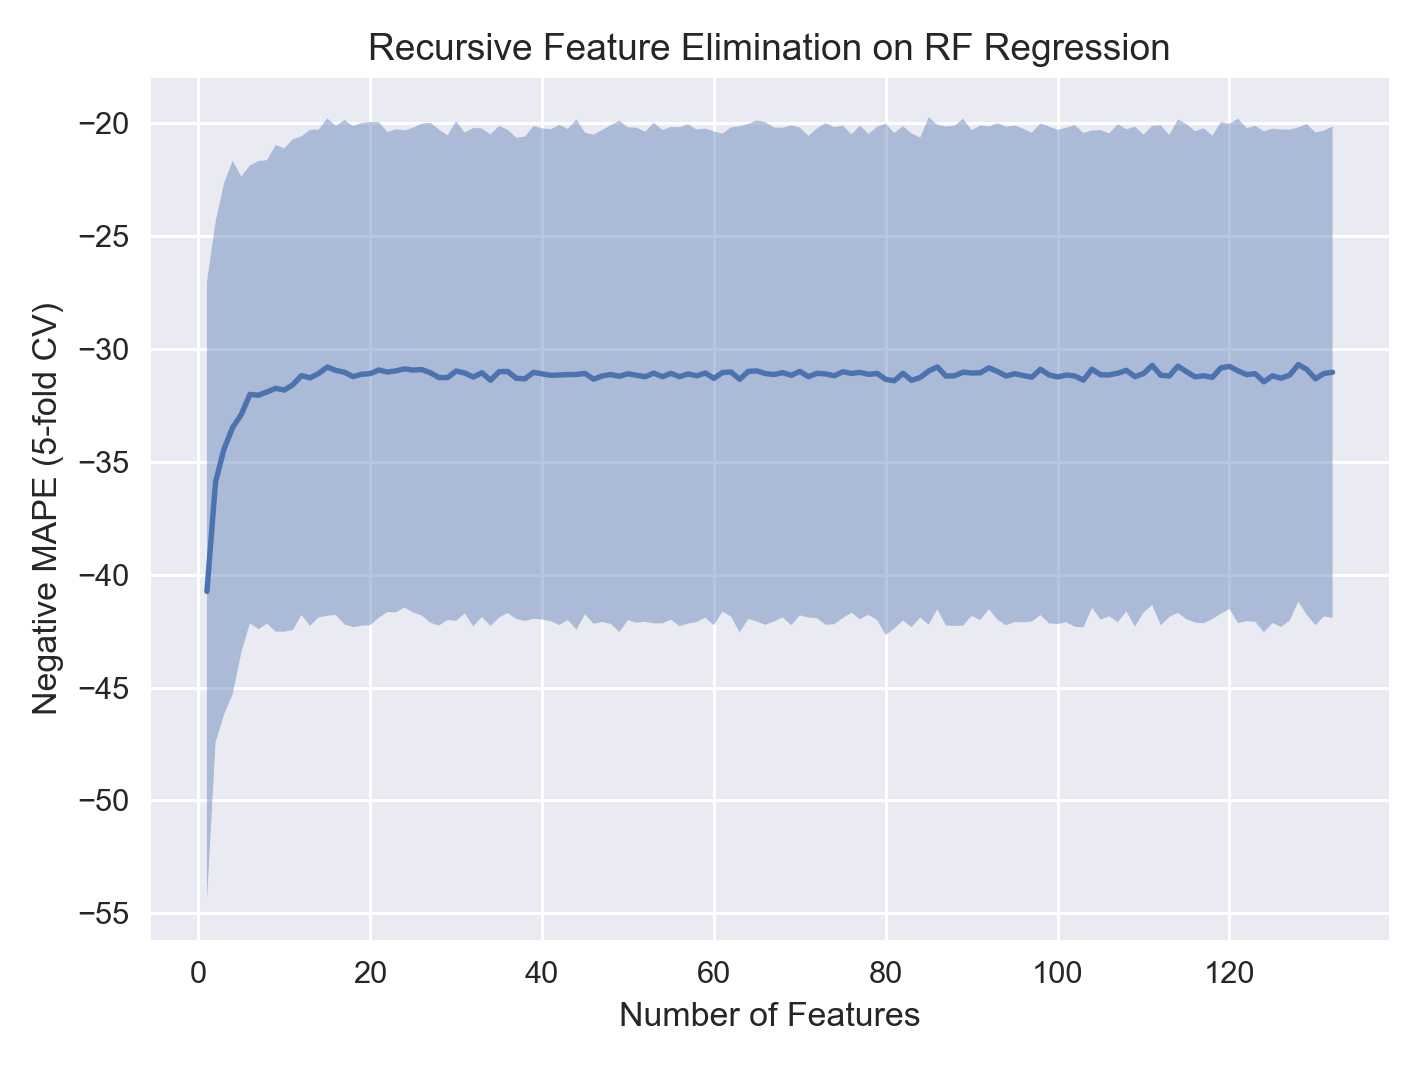

Text(0.5,1,'Recursive Feature Elimination on RF Regression')

In [13]:
plt.figure()
plt.plot(np.arange(scores_mean.shape[0])+1,
         scores_mean)

plt.fill_between(np.arange(scores_mean.shape[0])+1,
                 scores_mean-scores_std,
                 scores_mean+scores_std,
                 alpha=0.4)

plt.xlabel('Number of Features')
plt.ylabel('Negative MAPE (5-fold CV)')
plt.title('Recursive Feature Elimination on RF Regression')

6 features is all you need... for 32% error........

In [14]:
ranks_mean = np.flip(np.mean(np.vstack(df_rfe.ranks),axis=0))
ranks_std = np.flip(np.std(np.vstack(df_rfe.ranks),axis=0))

df_ranks = pd.DataFrame({'avg_rank':ranks_mean, 'std_rank':ranks_std}, index=X.columns)
df_ranks.sort_values('avg_rank', ascending=False)[:12]

,avg_rank,std_rank
mode Electronegativity,129.2,3.187475
minimum Electronegativity,127.0,4.335897
mode Row,125.6,4.454211
mode AtomicWeight,125.2,4.354308
mode NdValence,125.0,5.865151
mode NValence,123.6,4.223742
minimum NValence,123.6,4.498889
minimum Row,122.2,5.268776
avg_dev NsUnfilled,121.6,6.343501
minimum AtomicWeight,120.2,6.764614


In [10]:
# Generic Model Evaluation Function...

def eval_model(estimator, X, y, hypes=None, n_splits=5, print_name=False):
    
    if print_name:
        print(estimator)
    
    cv = model_selection.KFold(n_splits=n_splits, shuffle=True)

    score = pd.DataFrame(columns=pd.MultiIndex.from_product([['train', 'val'], ['mae', 'pearson', 'spearman']]))
    
    for idx, (train, val) in enumerate(cv.split(X)):
        
        model_i = estimator(**hypes) # Would eventually like to be able to pass hyperparameters here
        model_i.fit(X.iloc[train], y[train])

        # MAE
        score.loc[idx, ('train','mae')] = mean_absolute_percentage_error(y[train], model_i.predict(X.iloc[train]))
        score.loc[idx, ('val','mae')] = mean_absolute_percentage_error(y[val], model_i.predict(X.iloc[val]))

        # pearson -- print just the coefficient; throw away the p-value
        score.loc[idx, ('train','pearson')] = stats.pearsonr(y[train], model_i.predict(X.iloc[train]))[0]
        score.loc[idx, ('val','pearson')] = stats.pearsonr(y[val], model_i.predict(X.iloc[val]))[0]

        # spearman -- print just the coefficient; throw away the p-value
        score.loc[idx, ('train','spearman')] = stats.spearmanr(y[train], model_i.predict(X.iloc[train]))[0]
        score.loc[idx, ('val','spearman')] = stats.spearmanr(y[val], model_i.predict(X.iloc[val]))[0]
        
    model_i.fit(X, y)
    
    return score, model_i

## Evaluate sets of 12 features of progressively lower "rank"

In [11]:
from sklearn import neural_network

In [ ]:
scores_nn, model_nn = eval_model(neural_network.MLPRegressor, X)

In [20]:
df_res = pd.DataFrame()
num_feats = 12

for i in range(X.shape[1]-num_feats):
    print(i)
    feat_set = df_ranks.sort_values('avg_rank', ascending=False)[i:i+num_feats].index.tolist()
    X_reduced = X[feat_set]
    ss, mm = eval_model(getattr(ensemble, df_ens.loc[1,'name']),
                        X_reduced,
                        y,
                        hypes={'n_estimators':100,
                               'max_depth':5})

    df_res = \
        df_res.append(pd.DataFrame({'num_feats': num_feats,
                                    'feat_set': [feat_set],
                                    'mape': (ss[('val','mae')].mean()),
                                    'mape_std': ss[('val','mae')].std()}),
                      ignore_index=True)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119


<IPython.core.display.Javascript object>


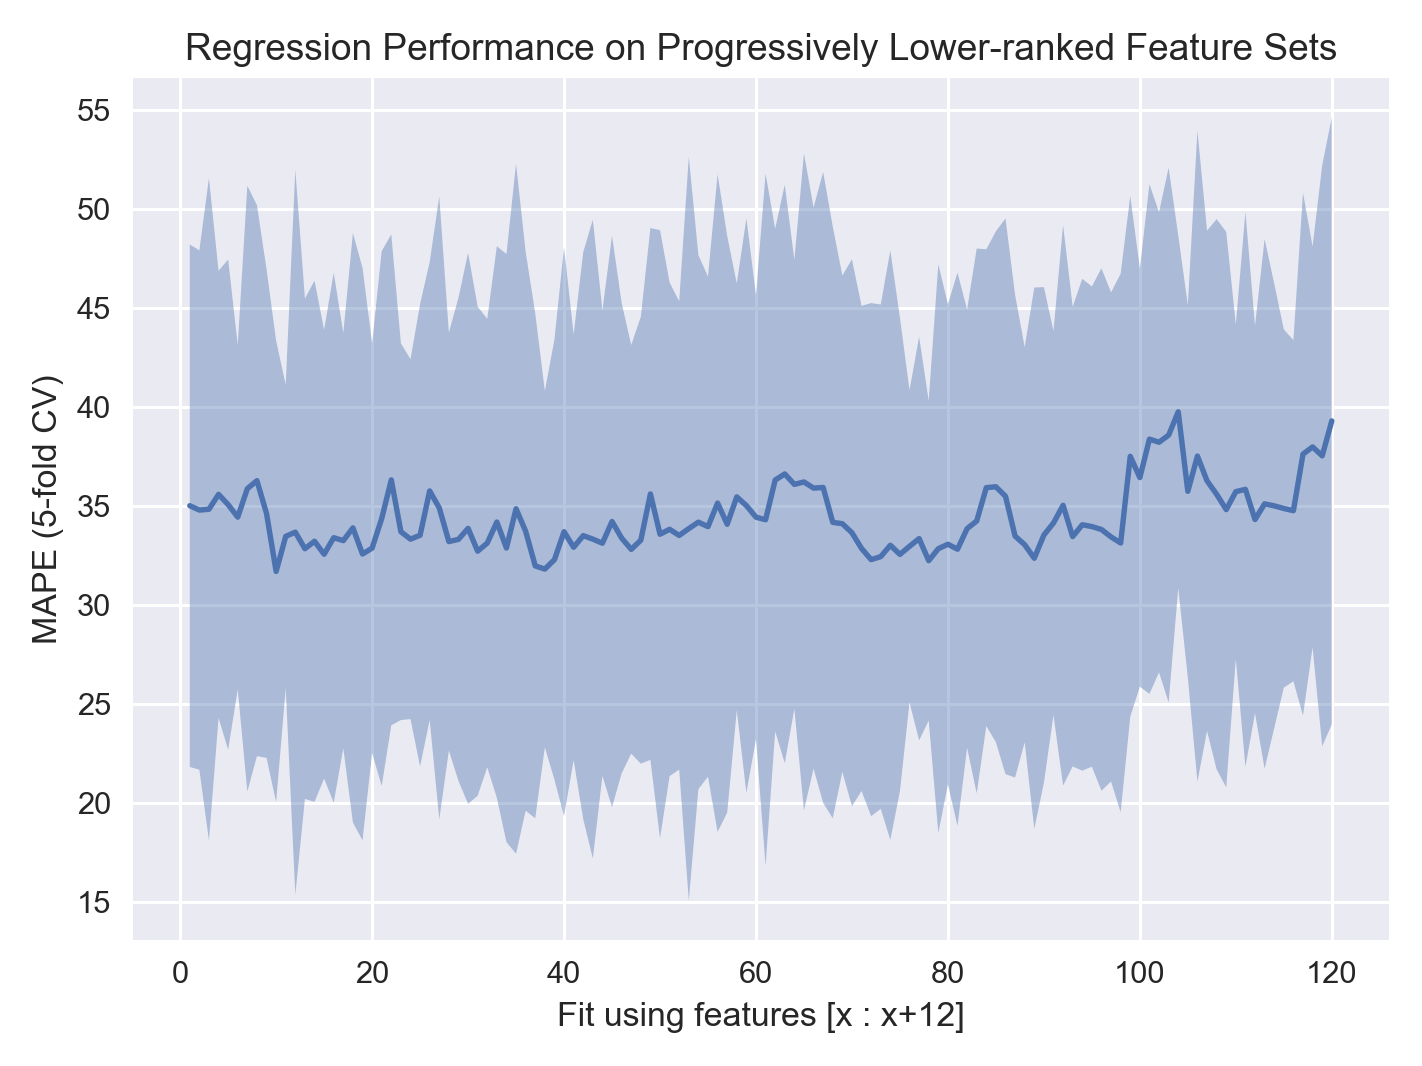

Text(0.5,1,'Regression Performance on Progressively Lower-ranked Feature Sets')

In [21]:
plt.figure()
plt.plot(np.arange(len(df_res['mape']))+1,
         df_res['mape'])

plt.fill_between(np.arange(len(df_res['mape']))+1,
                 df_res['mape']-df_res['mape_std'],
                 df_res['mape']+df_res['mape_std'],
                 alpha=0.4)

plt.xlabel('Fit using features [x : x+{}]'.format(num_feats))
plt.ylabel('MAPE (5-fold CV)')
plt.title('Regression Performance on Progressively Lower-ranked Feature Sets')

In [23]:
df_res.sort_values('mape').head()

,num_feats,feat_set,mape,mape_std
9,12,"[minimum AtomicWeight, minimum NsValence, avg_...",31.686053,11.652609
37,12,"[mode Number, mean NdValence, mode NfValence, ...",31.803710,8.997557
36,12,"[avg_dev NfUnfilled, mode Number, mean NdValen...",31.966388,12.749523
77,12,"[mode NpUnfilled, mean SpaceGroupNumber, avg_d...",32.229291,8.074836
38,12,"[mean NdValence, mode NfValence, range NsUnfil...",32.280807,11.113517


## Evaluate sets of 6 features of progressively lower "rank"

In [24]:
num_feats = 6

for i in range(X.shape[1]-num_feats):
    print(i)
    feat_set = df_ranks.sort_values('avg_rank', ascending=False)[i:i+num_feats].index.tolist()
    X_reduced = X[feat_set]
    ss, mm = eval_model(getattr(ensemble, df_ens.loc[1,'name']),
                        X_reduced,
                        y,
                        hypes={'n_estimators':100,
                               'max_depth':5})

    df_res = \
        df_res.append(pd.DataFrame({'num_feats': num_feats,
                                    'feat_set': [feat_set],
                                    'mape': (ss[('val','mae')].mean()),
                                    'mape_std': ss[('val','mae')].std()}),
                      ignore_index=True)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125


<IPython.core.display.Javascript object>


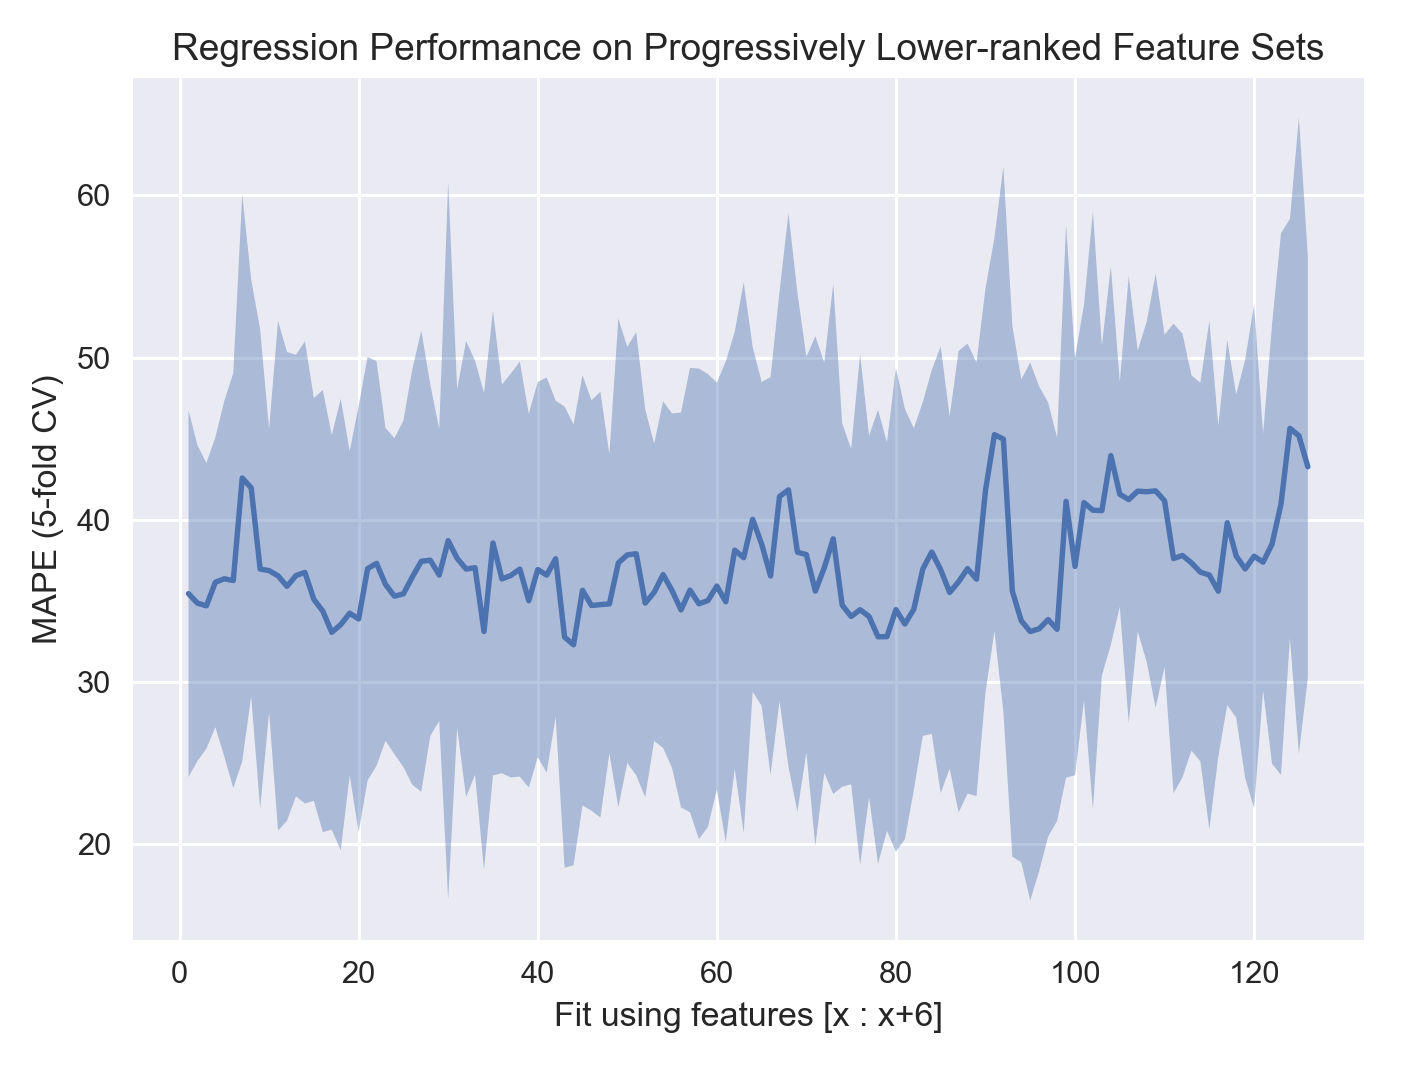

Text(0.5,1,'Regression Performance on Progressively Lower-ranked Feature Sets')

In [25]:
df6 = df_res.groupby('num_feats').get_group(6)
plt.figure()
plt.plot(np.arange(len(df6['mape']))+1,
         df6['mape'])

plt.fill_between(np.arange(len(df6['mape']))+1,
                 df6['mape']-df6['mape_std'],
                 df6['mape']+df6['mape_std'],
                 alpha=0.4)

plt.xlabel('Fit using features [x : x+{}]'.format(num_feats))
plt.ylabel('MAPE (5-fold CV)')
plt.title('Regression Performance on Progressively Lower-ranked Feature Sets')

Best set is somewhere around 17??

In [26]:
df6.sort_values('mape').head()

,num_feats,feat_set,mape,mape_std
163,6,"[mode NUnfilled, minimum Number, minimum NfUnf...",32.292950,13.593420
162,6,"[mean NfUnfilled, mode NUnfilled, minimum Numb...",32.760047,14.214845
197,6,"[mode NpUnfilled, mean SpaceGroupNumber, avg_d...",32.787781,13.990743
198,6,"[mean SpaceGroupNumber, avg_dev NpValence, ran...",32.795367,11.965248
136,6,"[range Electronegativity, mode NsValence, maxi...",33.060778,12.169777


## Evalute every combination of 4 features around the minimum at feature set 17

In [28]:
from itertools import combinations

In [31]:
feat_start = 15; feat_stop = 22;
feat_list_reduced = df_ranks.sort_values('avg_rank', ascending=False)[feat_start:feat_stop].index.tolist()
num_feats = 4

df_combi_res = pd.DataFrame()

for feat_set in combinations(feat_list_reduced, num_feats):
    print(feat_set)
    X_reduced = X[list(feat_set)]
    ss, mm = eval_model(getattr(ensemble, df_ens.loc[1,'name']),
                        X_reduced,
                        y,
                        hypes={'n_estimators':100,
                               'max_depth':5})

    df_combi_res = \
        df_combi_res.append(pd.DataFrame({'feat_set': [feat_set],
                                          'mae': (ss[('val','mae')].mean()),
                                          'mae_std': ss[('val','mae')].std()}),
                            ignore_index=True)

('maximum AtomicWeight', 'range Electronegativity', 'mode NsValence', 'maximum Electronegativity')
('maximum AtomicWeight', 'range Electronegativity', 'mode NsValence', 'avg_dev NValence')
('maximum AtomicWeight', 'range Electronegativity', 'mode NsValence', 'mean Electronegativity')
('maximum AtomicWeight', 'range Electronegativity', 'mode NsValence', 'range AtomicWeight')
('maximum AtomicWeight', 'range Electronegativity', 'maximum Electronegativity', 'avg_dev NValence')
('maximum AtomicWeight', 'range Electronegativity', 'maximum Electronegativity', 'mean Electronegativity')
('maximum AtomicWeight', 'range Electronegativity', 'maximum Electronegativity', 'range AtomicWeight')
('maximum AtomicWeight', 'range Electronegativity', 'avg_dev NValence', 'mean Electronegativity')
('maximum AtomicWeight', 'range Electronegativity', 'avg_dev NValence', 'range AtomicWeight')
('maximum AtomicWeight', 'range Electronegativity', 'mean Electronegativity', 'range AtomicWeight')
('maximum AtomicWeig

In [33]:
df_combi_res.sort_values('mae').head()

,feat_set,mae,mae_std
29,"(range Electronegativity, avg_dev NValence, me...",33.334255,12.102163
7,"(maximum AtomicWeight, range Electronegativity...",33.443541,11.474919
26,"(range Electronegativity, maximum Electronegat...",33.598332,11.333976
33,"(mode NsValence, avg_dev NValence, mean Electr...",33.904199,10.291187
23,"(range Electronegativity, mode NsValence, avg_...",33.906020,8.641381


## Test the best feature set for correlations with itself and target

<IPython.core.display.Javascript object>


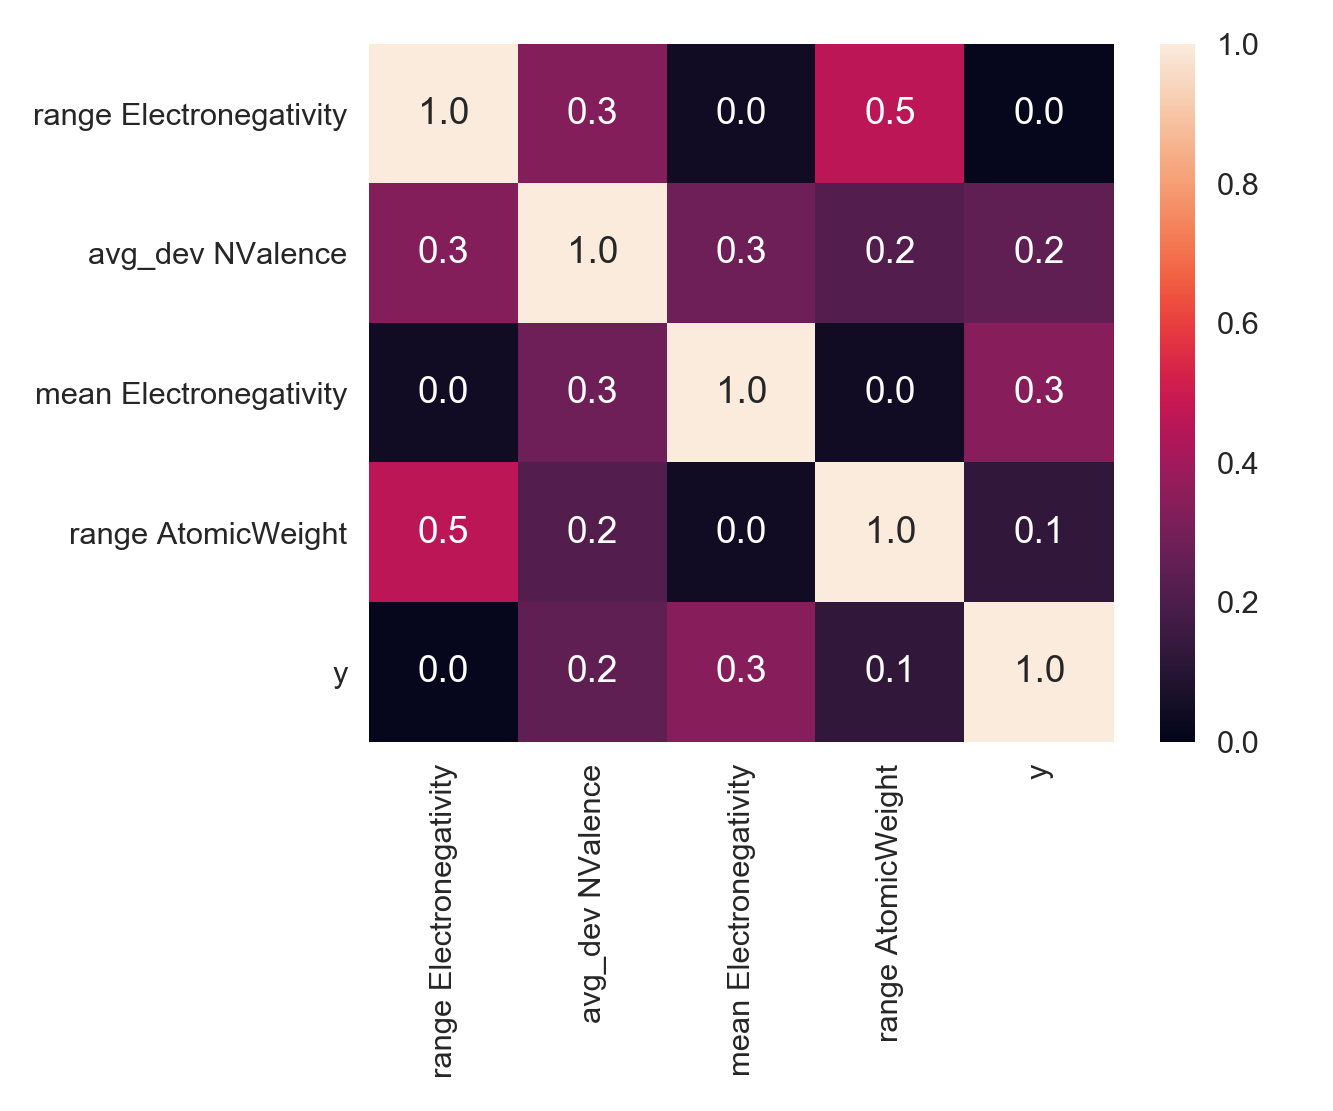

In [34]:
import seaborn as sns
best_feat_set = list(df_combi_res.sort_values('mae')['feat_set'].iloc[0])
df_feat_cor = pd.concat([X[best_feat_set],
                         pd.DataFrame({'y':y}, index=X.index)],
                        axis=1)
plt.figure(figsize=(6,5))
sns.heatmap(df_feat_cor.corr().abs(),
            annot=True, fmt='.1f', vmin=0, vmax=1, annot_kws={"size": 12})

## Finally, let's dig into the best model with only 4 features

In [35]:
X_reduced = X[best_feat_set]
ss, mm = eval_model(getattr(ensemble, df_ens.loc[1,'name']),
                    X_reduced,
                    y,
                    hypes={'n_estimators':100,
                           'max_depth':5})

mm

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

<IPython.core.display.Javascript object>


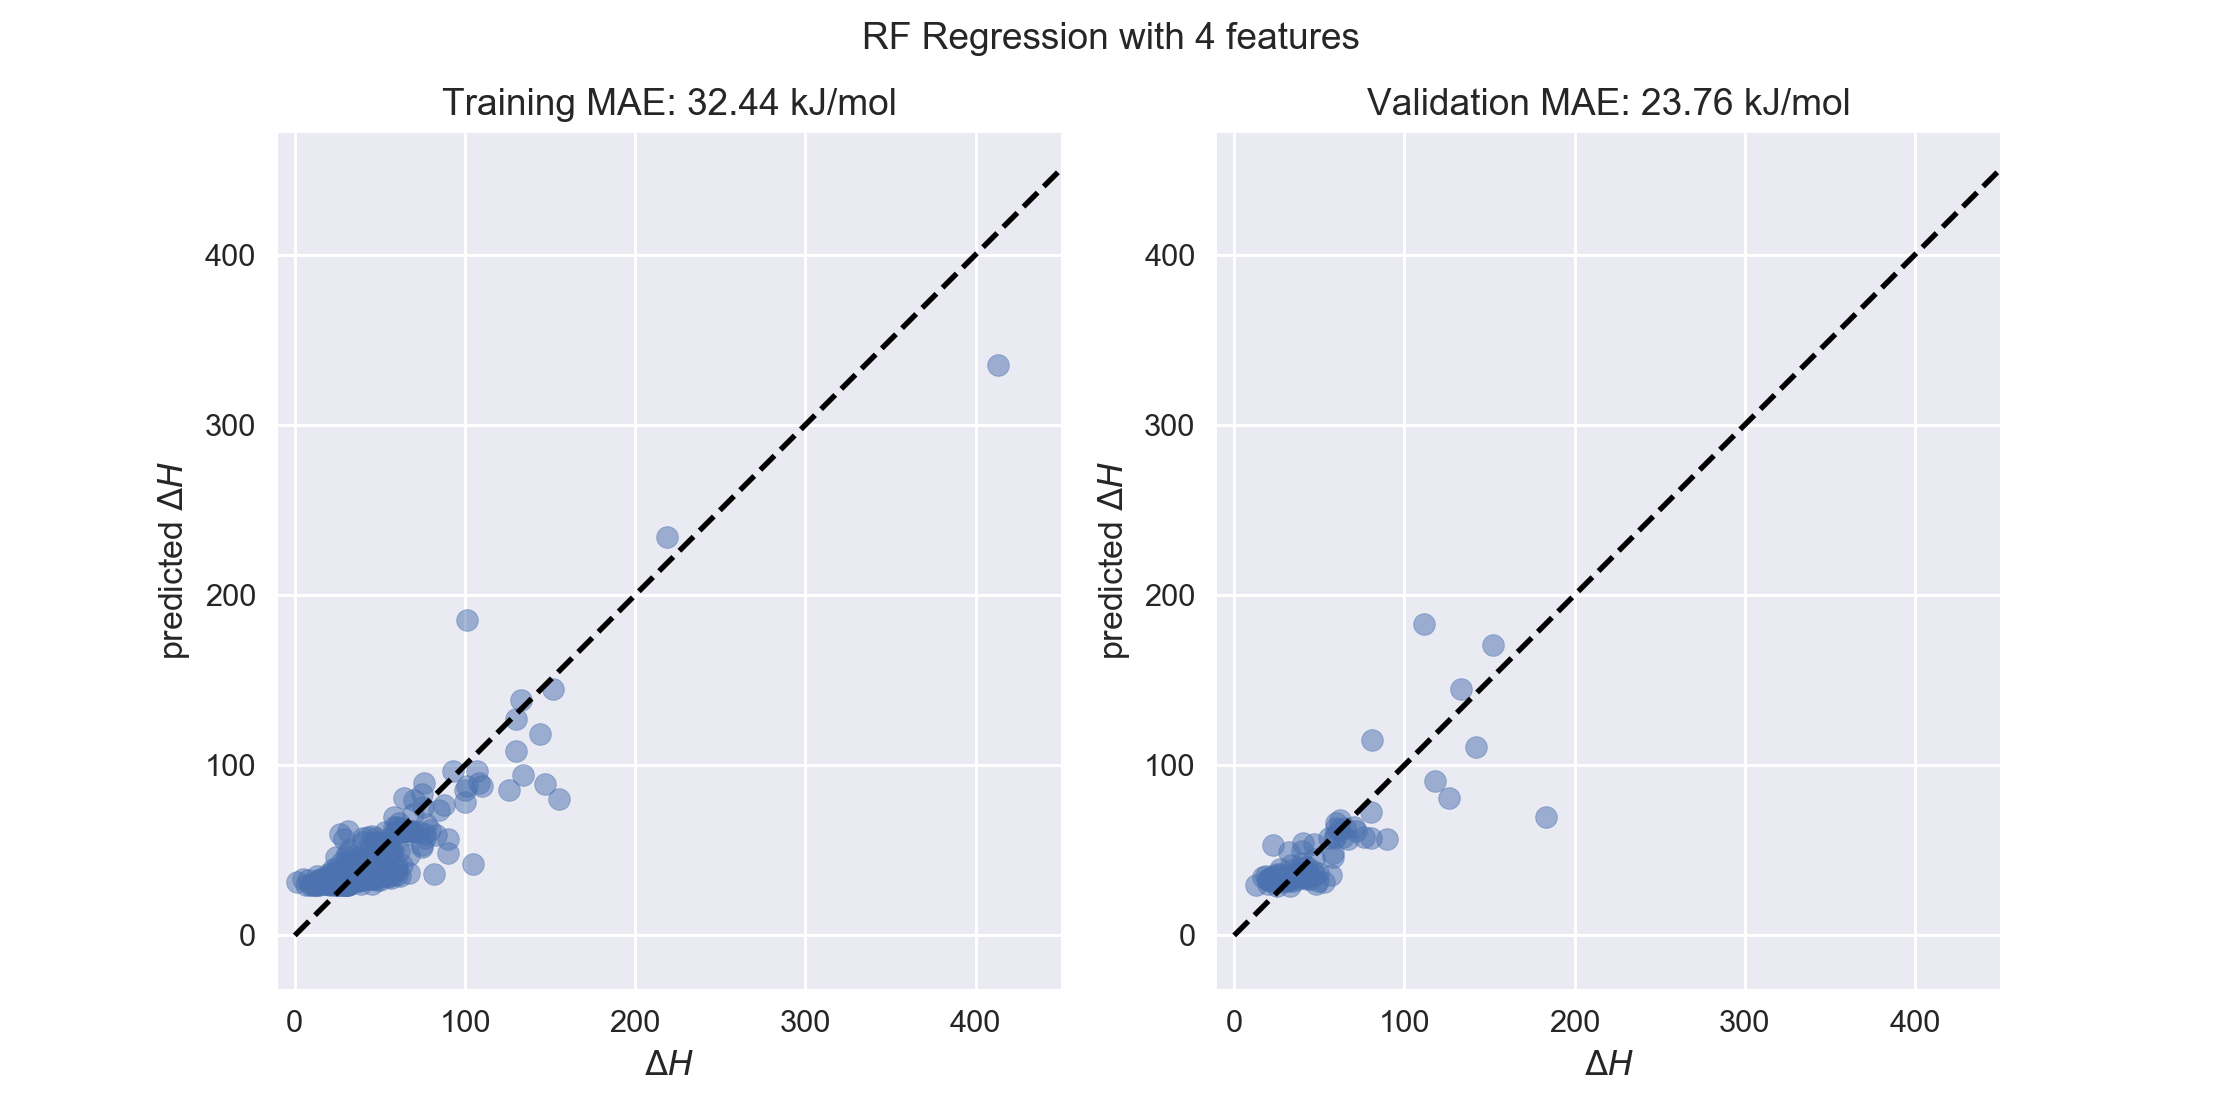

Text(0.5,0.98,'RF Regression with 4 features')

In [36]:
from sklearn.base import clone

X_train, X_val, y_train, y_val = model_selection.train_test_split(X_reduced, y, test_size=0.2)

reg1 = clone(mm)
plt.figure(figsize=(10,5), tight_layout=False)
plt.subplot(1,2,1)
parity_plot(y_train, reg1.fit(X_train,y_train).predict(X_train), newfig=False, title='Training ')
plt.subplot(1,2,2)
parity_plot(y_val, reg1.fit(X_train,y_train).predict(X_val), newfig=False, title='Validation ')
plt.gcf().suptitle('RF Regression with 4 features')

In [108]:
from sklearn.externals.six import StringIO  
from PIL import Image  
from sklearn.tree import export_graphviz
import pydotplus

tree_num = 0
dot_data = StringIO()
export_graphviz(reg1.estimators_[tree_num], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X_train.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph_file = 'images/tree_{}.png'.format(tree_num)
graph.write_png(graph_file)
Image.open(graph_file)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [ ]:
X_reduced = X[df_ranks.sort_values('avg_rank', ascending=False)[1:13].index.tolist()]
ss, mm = eval_model(getattr(ensemble, df_ens.loc[1,'name']),
                    X_reduced,
                    y,
                    hypes={'n_estimators':100})

ss

In [ ]:
X.to_csv('X.csv', index=False)

In [ ]:
pd.Series(y, name='y').to_csv('y.csv')